In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [3]:
print(sys.executable)

/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/bin/python


In [4]:
os.chdir("..")
sys.path.append("data")
sys.path.append("src")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from data_pipeline import load_data, preprocess_df
from evaluation import confusion_matrix_plot

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/anveshradharapu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anveshradharapu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anveshradharapu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anveshradharapu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anveshradharapu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
df_train = load_data("data/training.csv")
df_test = load_data("data/test.csv") 
df_val = load_data("data/validation.csv")

In [8]:
print(df_train.head())
print(df_train.info())
print(df_train.shape)

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None
(16000, 2)


In [9]:
df = preprocess_df(df_train)

In [10]:
df.head()

,text,label,clean_text
0,i didnt feel humiliated,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,feeling grouchy


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, stratify=df["label"], random_state=42
)

In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [13]:
TfidfVectorizer(max_features=5000, ngram_range=(1,2))

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [14]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


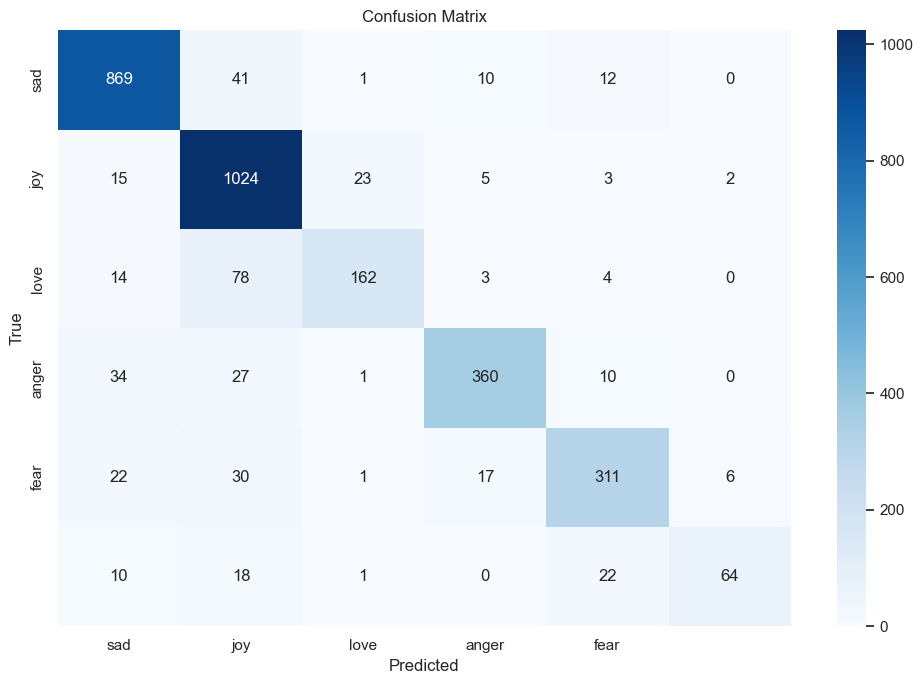

In [15]:
confusion_matrix_plot(y_test, clf.predict(X_test_vec))

In [16]:
y_pred = clf.predict(X_test_vec)
report = classification_report(y_test, y_pred)
print(report)
with open('outputs/classification_report.txt', 'w') as f:
    f.write(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       933
           1       0.84      0.96      0.89      1072
           2       0.86      0.62      0.72       261
           3       0.91      0.83      0.87       432
           4       0.86      0.80      0.83       387
           5       0.89      0.56      0.68       115

    accuracy                           0.87      3200
   macro avg       0.88      0.78      0.82      3200
weighted avg       0.87      0.87      0.87      3200



In [17]:
joblib.dump(clf, "models/log_reg_model.pkl")
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")

['models/tfidf_vectorizer.pkl']